In [1]:
import imageio
import glob
from PIL import Image

import os
import platform
import glob

import matplotlib.image as image

import natsort
import matplotlib.pyplot as plt

In [54]:
root = "G:\공유 드라이브\SWTube\프로젝트/044. 2021 소융튜브 특성화 프로젝트\데이터 팀\mount_drive\Darkest-Cave\Data/Content_Images"
root = os.path.normpath(root)

content = glob.glob(root + "/*")
content_list = []
for i in range(0, len(content)):
    content_list.append(os.path.split(content[i])[1])

content_image_full_path = []
for i in range(0, len(content_list)):
    content_image_full_path.append(natsort.natsorted(glob.glob(os.path.join(root, content_list[i]) + "/*"))[0])

content_image_full_path

['G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Content_Images\\skeleton_64\\sprite_00.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Content_Images\\Dinosaur_64\\sprite_03.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Content_Images\\fireball_64\\sprite_08.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Content_Images\\mosquito_64\\sprite_21.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Content_Images\\fairy_64\\sprite_000.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Content_Images\\dust_64\\sprite_00.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Content_Images\\twinkle_64\\sprite_020.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044.

In [71]:
root = "G:\공유 드라이브\SWTube\프로젝트/044. 2021 소융튜브 특성화 프로젝트\데이터 팀\mount_drive\Darkest-Cave\Data/Styled_Images/Mobilenets2/horror/red_skull.jpg"
root = os.path.normpath(root)

style = glob.glob(root + "/*")
style_list = []
for i in range(0, len(style)):
    style_list.append(os.path.split(style[i])[1])

style_image_full_path = []
for i in range(0, len(style_list)):
    style_image_full_path.append(natsort.natsorted(glob.glob(os.path.join(root, style_list[i]) + "/*"))[0])

style_image_full_path

['G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Styled_Images\\Mobilenets2\\horror\\red_skull.jpg\\skeleton_128\\skeleton_128_0_final.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Styled_Images\\Mobilenets2\\horror\\red_skull.jpg\\skeleton_64\\skeleton_64_0_final.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Styled_Images\\Mobilenets2\\horror\\red_skull.jpg\\Green_adventurer_32\\Green_adventurer_32_0_final.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Styled_Images\\Mobilenets2\\horror\\red_skull.jpg\\Yolk_32\\Yolk_32_0_final.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Darkest-Cave\\Data\\Styled_Images\\Mobilenets2\\horror\\red_skull.jpg\\king_32\\king_32_0_final.png',
 'G:\\공유 드라이브\\SWTube\\프로젝트\\044. 2021 소융튜브 특성화 프로젝트\\데이터 팀\\mount_drive\\Dark

In [ ]:
root_dir = "temp_image/"
img_path_list = []
possible_img_extension = ['.jpg', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들
 
for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                
                # 경로에서 \를 모두 /로 바꿔줘야함
                img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
                img_path_list.append(img_path)

images = []

filenames = img_path_list
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('temp_image/mobilenet2.gif', images)

# 투명 배경을 흰색으로 바꾸어 저장하는 코드
# png = Image.open(img_path).convert('RGBA')
# background = Image.new('RGBA', png.size, (255,255,255))
# alpha_composite = Image.alpha_composite(background, png)
# alpha_composite.save('foo.jpg', 'JPEG', quality=80)

In [ ]:
# 경로 통일이 되지 않아 중간에 포기함

# 원본 index번 째 폴더의 첫 번째 이미지
index = 0
content_folder_list = glob.glob(content_location) # 콘텐츠 이미지 폴더 리스트
content_image = glob.glob(content_folder_list[index] + "/*")

# 모델의 horror2번 째 index 폴더의 첫 번째 이미지
model_index = 0
style_index = 0

styled_folder_list = glob.glob(styled_location) # 스타일 전이 이미지 모델 리스트
styled_style_list = glob.glob(styled_folder_list[model_index] + "/*") # horror, dark ...
styled_style_image_list = glob.glob(styled_style_list[1] + "/*") # horror2, horror3 ...
styled_image_list = glob.glob(styled_style_image_list[style_index] + "/*") # items, player, male ...
styled_image = glob.glob(styled_image_list[index] + "/*") # 현재 스타일 전이가 동일하게 되어있지 않아 인덱스가 다름

img = image.imread(styled_image[0])
plt.title(styled_image[0])
plt.imshow(img)

In [4]:
platform_path = platform.platform()
IsColab = "bionic" in platform_path

if IsColab:
    style_location = "/content/drive/Shareddrives/SWTube/프로젝트/044. 2021 소융튜브 특성화 프로젝트/데이터 팀/mount_drive/Darkest-Cave/Data/Style_Images/*"
    content_location = "/content/drive/Shareddrives/SWTube/프로젝트/044. 2021 소융튜브 특성화 프로젝트/데이터 팀/mount_drive/Darkest-Cave/Data/Content_Images/*"
    styled_location = "/content/drive/Shareddrives/SWTube/프로젝트/044. 2021 소융튜브 특성화 프로젝트/데이터 팀/mount_drive/Darkest-Cave/Data/Styled_Images/"
else:
    style_location = 'Style_Images/*'
    content_location = "Content_Images/*"
    styled_location = "Styled_Images/*"

# 필요한 전역 인덱스
# 어떤 이미지 콘텐츠를 선택할 것인지에 대한 인덱스 (폴더 리스트의 길이의 범위)
# 선택한 이미지 콘텐츠 내의 몇 번째 사진인지에 대한 인덱스 (해당 콘텐츠 이미지 리스트의 길이의 범위)
# 모델 별 스타일 콘텐츠 이미지 1장

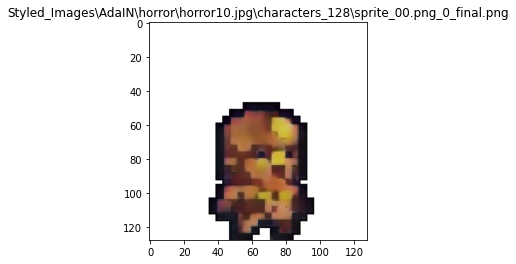

In [5]:
# 경로 통일이 되지 않아 중간에 포기함

# 원본 index번 째 폴더의 첫 번째 이미지
index = 0
content_folder_list = glob.glob(content_location) # 콘텐츠 이미지 폴더 리스트
content_image = glob.glob(content_folder_list[index] + "/*")

# 모델의 horror2번 째 index 폴더의 첫 번째 이미지
model_index = 0
style_index = 0

styled_folder_list = glob.glob(styled_location) # 스타일 전이 이미지 모델 리스트
styled_style_list = glob.glob(styled_folder_list[model_index] + "/*") # horror, dark ...
styled_style_image_list = glob.glob(styled_style_list[1] + "/*") # horror2, horror3 ...
styled_image_list = glob.glob(styled_style_image_list[style_index] + "/*") # items, player, male ...
styled_image = glob.glob(styled_image_list[index] + "/*") # 현재 스타일 전이가 동일하게 되어있지 않아 인덱스가 다름

img = image.imread(styled_image[0])
plt.title(styled_image[0])
plt.imshow(img)

In [ ]:
# 그나마 쓸만한 코드

model_list = ["AdaIN", "inceptionV3", "Mobilenets1", "Mobilenets2"]

# 특정 이미지를 전부 검색
for image_index in range(0, 52):

    fig = plt.figure(figsize=(32,32))
    plt.tight_layout(pad=0)
    rows = 6
    cols = 6
    i = 1
    image_list = []

    for (path, dir, files) in os.walk("Styled_Images/Mobilenets2"):
        for filename in files:
            if filename == 'skeleton_128_{}_final.png'.format(image_index):
                image_list.append("%s/%s" % (path, filename))
    image_list = natsort.natsorted(image_list)

    for filename in image_list:
        img = image.imread(filename)
        ax = fig.add_subplot(rows, cols, i)
        ax.set_xticks([]), ax.set_yticks([])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
        ax.imshow(img)
        i += 1

        fig.savefig('Mobilenets2_{}.png'.format(image_index))

In [ ]:
# 특정 이미지를 전부 검색
fig = plt.figure(figsize=(32,32))
plt.tight_layout(pad=0)
rows = 8
cols = 9
i = 1
image_list = []

image_list = style_image_full_path

for filename in image_list:
    img = image.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
    ax.imshow(img)
    i += 1

    fig.savefig('styled_image.png'.format(image_index))

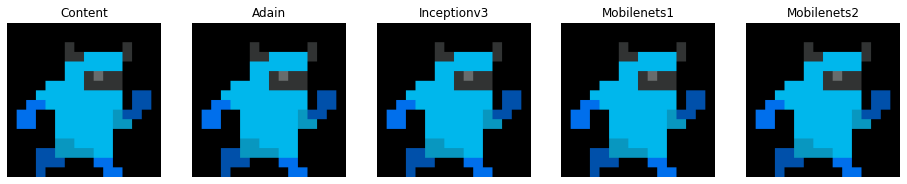

In [8]:
# 모델 별로 비교하려고 했는데 스타일 이미지에 따라 특성이 제각각이라 보류, 필요하긴 할 듯

import cv2 as cv
import random

index_list = []
while(len(index_list) != 5):
    index_list.append(random.randrange(0, len(content_folder_list)))

fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i in range(0, len(index_list)):
    for ax, interp in zip(axs, ['content', 'AdaIN', 'inceptionV3', 'Mobilenets1', 'Mobilenets2']):
        content_image_path = glob.glob(content_folder_list[index_list[i]] + "/*")
        img = cv.imread(str(content_image_path[0]))
        ax.imshow(img)
        ax.set_title(interp.capitalize())
        ax.axis('off')

plt.show()